In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress
from pathlib import Path

# Import API key
from api_keys import geoapify_key

In [2]:
# Read the exported csv files from Data Cleaning notebook
combined_2017 = pd.read_csv(Path("Output_data/Final_combined/2017_quarter_combined.csv"))
combined_2018 = pd.read_csv(Path("Output_data/Final_combined/2018_quarter_combined.csv"))
combined_2019 = pd.read_csv(Path("Output_data/Final_combined/2019_quarter_combined.csv"))
combined_2020 = pd.read_csv(Path("Output_data/Final_combined/2020_quarter_combined.csv"))
combined_2021 = pd.read_csv(Path("Output_data/Final_combined/2021_quarter_combined.csv"))
combined_2022 = pd.read_csv(Path("Output_data/Final_combined/2022_quarter_combined.csv"))
combined_2023 = pd.read_csv(Path("Output_data/Final_combined/2023_quarter_combined.csv"))

In [3]:
# Merge data from 2017 to 2023
combined_df = pd.merge(combined_2017, combined_2018, how="outer", on=["City", "Suburb"]).merge(combined_2019, how='outer',\
     on=["City", "Suburb"]).merge(combined_2020, how='outer', on=["City", "Suburb"]).merge(combined_2021, how="outer", \
        on=["City", "Suburb"]).merge(combined_2022,how='outer', on=["City", "Suburb"]).merge(combined_2023, how= "outer", on=["City", "Suburb"])

combined_df.head()

C:\Users\hoang\AppData\Local\Temp\ipykernel_10392\481027738.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Number ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  combined_df = pd.merge(combined_2017, combined_2018, how="outer", on=["City", "Suburb"]).merge(combined_2019, how='outer',\
C:\Users\hoang\AppData\Local\Temp\ipykernel_10392\481027738.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Number ID_x'} in the result is deprecated and will raise a MergeError in a future version.
  combined_df = pd.merge(combined_2017, combined_2018, how="outer", on=["City", "Suburb"]).merge(combined_2019, how='outer',\


,Number ID,City,Suburb,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,...,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Number ID_y,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
0,0.0,ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,...,853000.0,6.0,1400000.0,18.0,0.0,2.0,1205000.0,4.0,978000.0,6.0
1,1.0,ADELAIDE,NORTH ADELAIDE,6.0,992500.0,6.0,1451000.0,9.0,1375000.0,5.0,...,1100500.0,6.0,1325000.0,31.0,1.0,5.0,1850000.0,3.0,1040000.0,8.0
2,2.0,ADELAIDE HILLS,ALDGATE,14.0,695000.0,20.0,756000.0,12.0,735000.0,10.0,...,1230000.0,14.0,1170000.0,42.0,2.0,13.0,1110000.0,11.0,1119045.0,24.0
3,3.0,ADELAIDE HILLS,ASHTON,1.0,415000.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,900000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,ADELAIDE HILLS,BASKET RANGE,1.0,470000.0,2.0,619500.0,1.0,488000.0,0.0,...,783000.0,1.0,875000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop null columns
clean_df = combined_df.drop([" Number ID", "Number ID_x", "Number ID_y"], axis =1)
clean_df.head()

,City,Suburb,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
0,ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,780500.0,...,5.0,853000.0,6.0,1400000.0,18.0,2.0,1205000.0,4.0,978000.0,6.0
1,ADELAIDE,NORTH ADELAIDE,6.0,992500.0,6.0,1451000.0,9.0,1375000.0,5.0,1095000.0,...,6.0,1100500.0,6.0,1325000.0,31.0,5.0,1850000.0,3.0,1040000.0,8.0
2,ADELAIDE HILLS,ALDGATE,14.0,695000.0,20.0,756000.0,12.0,735000.0,10.0,675000.0,...,17.0,1230000.0,14.0,1170000.0,42.0,13.0,1110000.0,11.0,1119045.0,24.0
3,ADELAIDE HILLS,ASHTON,1.0,415000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,900000.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ADELAIDE HILLS,BASKET RANGE,1.0,470000.0,2.0,619500.0,1.0,488000.0,0.0,0.0,...,2.0,783000.0,1.0,875000.0,4.0,NaN,NaN,NaN,NaN,NaN


**SOUTHERN SUBURBS ANALYSIS**
-----------------------------

In [5]:
# set suburb as index for analysis
suburb= clean_df.set_index("Suburb")
suburb.head()

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,780500.0,22.0,...,5.0,853000.0,6.0,1400000.0,18.0,2.0,1205000.0,4.0,978000.0,6.0
NORTH ADELAIDE,ADELAIDE,6.0,992500.0,6.0,1451000.0,9.0,1375000.0,5.0,1095000.0,26.0,...,6.0,1100500.0,6.0,1325000.0,31.0,5.0,1850000.0,3.0,1040000.0,8.0
ALDGATE,ADELAIDE HILLS,14.0,695000.0,20.0,756000.0,12.0,735000.0,10.0,675000.0,56.0,...,17.0,1230000.0,14.0,1170000.0,42.0,13.0,1110000.0,11.0,1119045.0,24.0
ASHTON,ADELAIDE HILLS,1.0,415000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,900000.0,2.0,NaN,NaN,NaN,NaN,NaN
BASKET RANGE,ADELAIDE HILLS,1.0,470000.0,2.0,619500.0,1.0,488000.0,0.0,0.0,4.0,...,2.0,783000.0,1.0,875000.0,4.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# suburbs under analysis
list_surburb = suburb.loc[["FLAGSTAFF HILL", "ADELAIDE", "GOODWOOD", "PASADENA", "EDWARDSTOWN"]]
list_surburb

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
FLAGSTAFF HILL,ONKAPARINGA,40.0,482000.0,42.0,505000.0,41.0,500000.0,41.0,511000.0,164.0,...,44.0,775000.0,35.0,785000.0,157.0,26.0,850000.0,27.0,815000.0,53.0
ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,780500.0,22.0,...,5.0,853000.0,6.0,1400000.0,18.0,2.0,1205000.0,4.0,978000.0,6.0
GOODWOOD,UNLEY,5.0,652500.0,9.0,795000.0,9.0,769000.0,5.0,752000.0,28.0,...,8.0,1450000.0,8.0,1429500.0,34.0,5.0,1590000.0,9.0,1430000.0,14.0
PASADENA,MITCHAM,11.0,563000.0,11.0,524000.0,9.0,552000.0,4.0,512500.0,35.0,...,9.0,860000.0,5.0,855000.0,38.0,5.0,735000.0,10.0,770000.0,15.0
EDWARDSTOWN,MARION,11.0,505750.0,17.0,500000.0,13.0,485000.0,10.0,482000.0,51.0,...,15.0,725000.0,12.0,735000.0,51.0,15.0,785000.0,10.0,850000.0,25.0


In [7]:
# plotting with median house price
price_unique_suburb = list_surburb.iloc[:, [2,4,6,8,11,13\
    ,15,17,20,22,24,26,29,31,33,35,38,40,42,44,47,49,51,53,56,58]]
price_unique_suburb

,Median Q1 2017,Median Q2 2017,Median Q3 2017,Median Q4 2017,Median Q1 2018,Median Q2 2018,Median Q3 2018,Median Q4 2018,Median Q1 2019,Median Q2 2019,...,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022,Median Q1 2023,Median Q2 2023
Suburb,,,,,,,,,,,,,,,,,,,,,
FLAGSTAFF HILL,482000.0,505000.0,500000.0,511000.0,478750.0,500000.0,530000.0,554500.0,510000.0,536000.0,...,602250.0,677000.0,620000.0,684000.0,720000.0,790000.0,775000.0,785000.0,850000.0,815000.0
ADELAIDE,627500.0,900000.0,695000.0,780500.0,861000.0,696000.0,960000.0,1660750.0,1002500.0,677500.0,...,1013000.0,1300000.0,1012500.0,1400000.0,1266250.0,940000.0,853000.0,1400000.0,1205000.0,978000.0
GOODWOOD,652500.0,795000.0,769000.0,752000.0,930000.0,1000000.0,665000.0,741250.0,991000.0,992500.0,...,970000.0,1662500.0,1207500.0,1250000.0,1557000.0,1686000.0,1450000.0,1429500.0,1590000.0,1430000.0
PASADENA,563000.0,524000.0,552000.0,512500.0,602175.0,692500.0,570000.0,590000.0,565000.0,689500.0,...,748000.0,616000.0,721000.0,802500.0,783500.0,891250.0,860000.0,855000.0,735000.0,770000.0
EDWARDSTOWN,505750.0,500000.0,485000.0,482000.0,535000.0,614000.0,574000.0,495000.0,532500.0,455000.0,...,522650.0,647500.0,640000.0,673000.0,820000.0,858000.0,725000.0,735000.0,785000.0,850000.0


In [8]:
# Define x_axis
quarter_list = price_unique_suburb.columns
x_axis= np.arange(len(quarter_list))

# y_axis Flagstaff Hill
price_flgh =price_unique_suburb.iloc[0,:]
flgh_price_list=list(price_flgh)

# y_axis Adelaide CBD
price_adelaide = price_unique_suburb.iloc[1,:]
ade_price_list= list(price_adelaide)

# y_axis Goodwood
price_Goodwood = price_unique_suburb.iloc[2,:]
Goodwood_price_list= list(price_Goodwood)

# y_axis Pasadena
price_Pasadena = price_unique_suburb.iloc[3,:]
Pasadena_price_list= list(price_Pasadena)

# y_axis edwardstown
price_edwardstown = price_unique_suburb.iloc[4,:]
edwardstown_price_list= list(price_edwardstown)

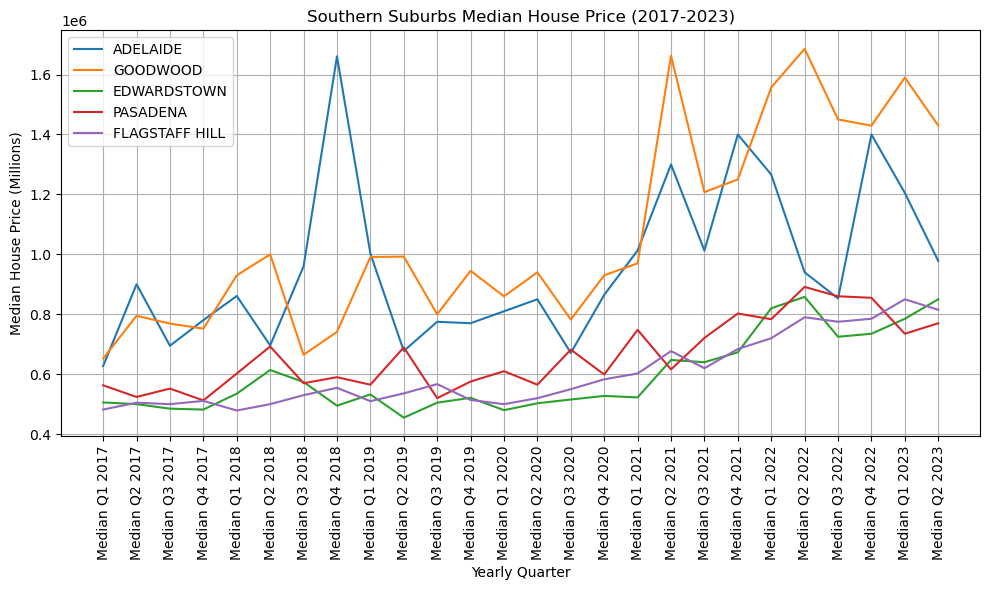

In [9]:
plt.figure(figsize=(10,6))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, ade_price_list, label="ADELAIDE")
plt.plot(x_axis, Goodwood_price_list, label="GOODWOOD")
plt.plot(x_axis, edwardstown_price_list, label="EDWARDSTOWN")
plt.plot(x_axis, Pasadena_price_list, label="PASADENA")
plt.plot(x_axis, flgh_price_list, label="FLAGSTAFF HILL")

plt.ylabel("Median House Price (Millions)")
plt.xlabel("Yearly Quarter")
plt.title("Southern Suburbs Median House Price (2017-2023)")
plt.tight_layout()
plt.grid()
plt.legend()

# Save plot
plt.savefig(f'Output_data/Plots/VAN_southn_suburbs_median_price_comparison.png')

# Show plot
plt.show()

FLAGSTAFF HILL TREND LINE
--------------------------

C:\Users\hoang\AppData\Local\Temp\ipykernel_10392\4177299549.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_axis ,regress_values, "r-", linestyle='--')


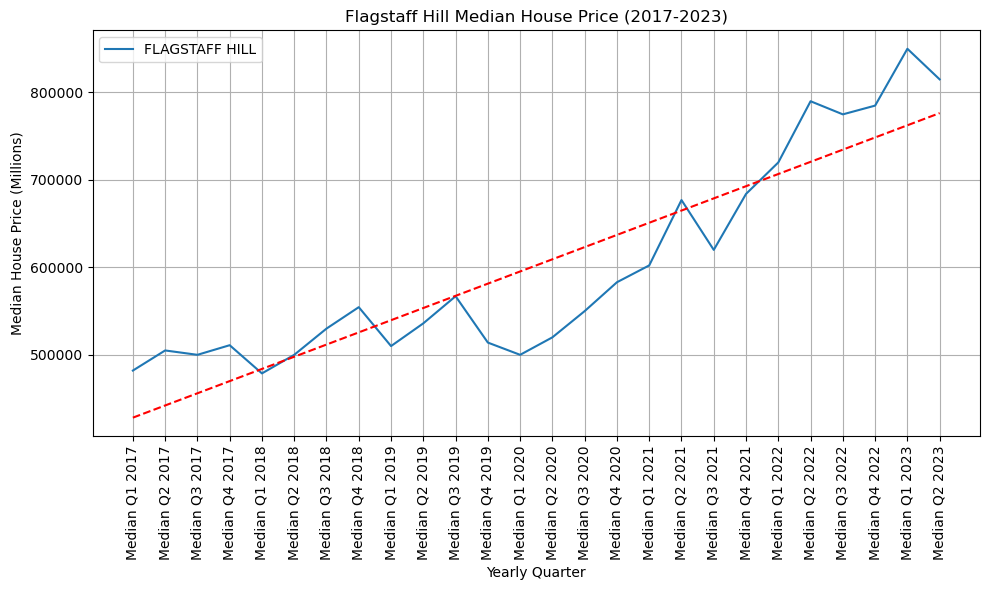

In [10]:
plt.figure(figsize=(10,6))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, flgh_price_list, label="FLAGSTAFF HILL")

# trend line
slope, intercept, r_value, p_value, std_err = linregress(x_axis, flgh_price_list)
regress_values = x_axis*slope + intercept
plt.plot(x_axis ,regress_values, "r-", linestyle='--')

plt.ylabel("Median House Price (Millions)")
plt.xlabel("Yearly Quarter")
plt.title("Flagstaff Hill Median House Price (2017-2023)")
plt.grid()
plt.tight_layout()
plt.legend()

# Save plot
plt.savefig(f'Output_data/Plots/VAN_flagstaffhill_trend_line.png')

# Show plot
plt.show()

ADELAIDE TREND LINE
-------------------------

C:\Users\hoang\AppData\Local\Temp\ipykernel_10392\1346293191.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_axis ,regress_values, "r-", linestyle='--')


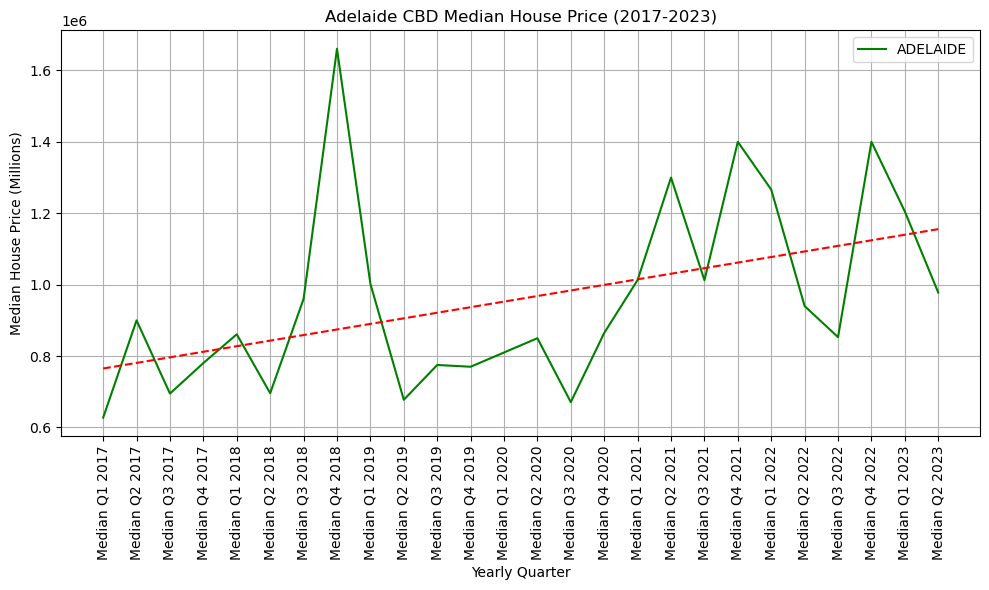

In [11]:
plt.figure(figsize=(10,6))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, ade_price_list, color="green", label="ADELAIDE")

# trend line
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, ade_price_list)
regress_values = x_axis*slope + intercept
plt.plot(x_axis ,regress_values, "r-", linestyle='--')

plt.ylabel("Median House Price (Millions)")
plt.xlabel("Yearly Quarter")
plt.title("Adelaide CBD Median House Price (2017-2023)")
plt.tight_layout()
plt.grid()
plt.legend()

# Save plot
plt.savefig(f'Output_data/Plots/VAN_adelaide_trend_line.png')

# Show plot
plt.show()

**WESTERN SUBURBS ANALYSIS**
--------------------------
Findon, Grange, Seaton comparison

In [12]:
surburb= clean_df.set_index("Suburb")
surburb

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,780500.0,22.0,...,5.0,853000.0,6.0,1400000.0,18.0,2.0,1205000.0,4.0,978000.0,6.0
NORTH ADELAIDE,ADELAIDE,6.0,992500.0,6.0,1451000.0,9.0,1375000.0,5.0,1095000.0,26.0,...,6.0,1100500.0,6.0,1325000.0,31.0,5.0,1850000.0,3.0,1040000.0,8.0
ALDGATE,ADELAIDE HILLS,14.0,695000.0,20.0,756000.0,12.0,735000.0,10.0,675000.0,56.0,...,17.0,1230000.0,14.0,1170000.0,42.0,13.0,1110000.0,11.0,1119045.0,24.0
ASHTON,ADELAIDE HILLS,1.0,415000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,900000.0,2.0,NaN,NaN,NaN,NaN,NaN
BASKET RANGE,ADELAIDE HILLS,1.0,470000.0,2.0,619500.0,1.0,488000.0,0.0,0.0,4.0,...,2.0,783000.0,1.0,875000.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HORSNELL GULLY,ADELAIDE HILLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1300000.0,1.0
HORSNELL GULLY,BURNSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1300000.0,1.0
ONKAPARINGA HEIGHTS,ONKAPARINGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,665000.0,1.0


In [13]:
list_surburb = surburb.loc[["FINDON", "GRANGE", "SEATON"]]
list_surburb

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
FINDON,CHARLES STURT,20.0,512500.0,22.0,495000.0,9.0,500000.0,20.0,511000.0,71.0,...,17.0,855000.0,18.0,750000.0,71.0,18.0,752500.0,25.0,780700.0,43.0
GRANGE,CHARLES STURT,16.0,762500.0,23.0,730000.0,6.0,700000.0,13.0,697750.0,58.0,...,12.0,1211000.0,18.0,995000.0,70.0,16.0,1186250.0,11.0,1191000.0,27.0
SEATON,CHARLES STURT,37.0,525000.0,28.0,507500.0,31.0,495000.0,32.0,505000.0,128.0,...,28.0,789000.0,41.0,747000.0,124.0,18.0,735000.0,41.0,785000.0,59.0


In [14]:
price_unique_suburb = list_surburb.iloc[:, [2,4,6,8,11,13\
    ,15,17,20,22,24,26,29,31,33,35,38,40,42,44,47,49,51,53,56,58]]
price_unique_suburb

,Median Q1 2017,Median Q2 2017,Median Q3 2017,Median Q4 2017,Median Q1 2018,Median Q2 2018,Median Q3 2018,Median Q4 2018,Median Q1 2019,Median Q2 2019,...,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022,Median Q1 2023,Median Q2 2023
Suburb,,,,,,,,,,,,,,,,,,,,,
FINDON,512500.0,495000.0,500000.0,511000.0,512000.0,519000.0,537500.0,545000.0,512500.0,560000.0,...,585000.0,456000.0,595000.0,682500.0,700000.0,770000.0,855000.0,750000.0,752500.0,780700.0
GRANGE,762500.0,730000.0,700000.0,697750.0,666000.0,692500.0,775000.0,752500.0,762500.0,780000.0,...,828000.0,950000.0,970000.0,968500.0,950000.0,1220000.0,1211000.0,995000.0,1186250.0,1191000.0
SEATON,525000.0,507500.0,495000.0,505000.0,517500.0,510000.0,522500.0,520705.0,526999.0,524850.0,...,578500.0,580000.0,630000.0,741250.0,760000.0,850000.0,789000.0,747000.0,735000.0,785000.0


In [15]:
sales_unique_suburb = list_surburb.iloc[:, [1,3,5,7,10,12,14\
    ,16,19,21,23,25,28,30,32,34,37,39,41,43,46,48,50,52,55,57]]
sales_unique_suburb

,Sales Q1 2017,Sales Q2 2017,Sales Q3 2017,Sales Q4 2017,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,...,Sales Q1 2021,Sales Q2 2021,Sales Q3 2021,Sales Q4 2021,Sales Q1 2022,Sales Q2 2022,Sales Q3 2022,Sales Q4 2022,Sales Q1 2023,Sales Q2 2023
Suburb,,,,,,,,,,,,,,,,,,,,,
FINDON,20.0,22.0,9.0,20.0,23.0,25.0,26.0,18.0,18.0,21.0,...,24.0,39.0,33.0,26.0,14.0,22.0,17.0,18.0,18.0,25.0
GRANGE,16.0,23.0,6.0,13.0,15.0,20.0,22.0,24.0,12.0,16.0,...,17.0,25.0,22.0,24.0,21.0,19.0,12.0,18.0,16.0,11.0
SEATON,37.0,28.0,31.0,32.0,26.0,28.0,28.0,27.0,29.0,33.0,...,25.0,33.0,39.0,41.0,27.0,28.0,28.0,41.0,18.0,41.0


In [16]:
quarter_list = price_unique_suburb.columns
x_axis= np.arange(len(quarter_list))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [17]:
quarter_list = sales_unique_suburb.columns
x_axis= np.arange(len(quarter_list))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [18]:
price_findon = price_unique_suburb.iloc[0,:]
findon_price_list = list(price_findon)

price_grange =price_unique_suburb.iloc[1,:]
grange_price_list=list(price_grange)

price_seaton = price_unique_suburb.iloc[2,:]
seaton_price_list = list(price_seaton)

In [19]:
sales_findon = sales_unique_suburb.iloc[0,:]
findon_sales_list = list(sales_findon)

sales_grange =sales_unique_suburb.iloc[1,:]
grange_sales_list=list(sales_grange)

sales_seaton = sales_unique_suburb.iloc[2,:]
seaton_sales_list = list(sales_seaton)

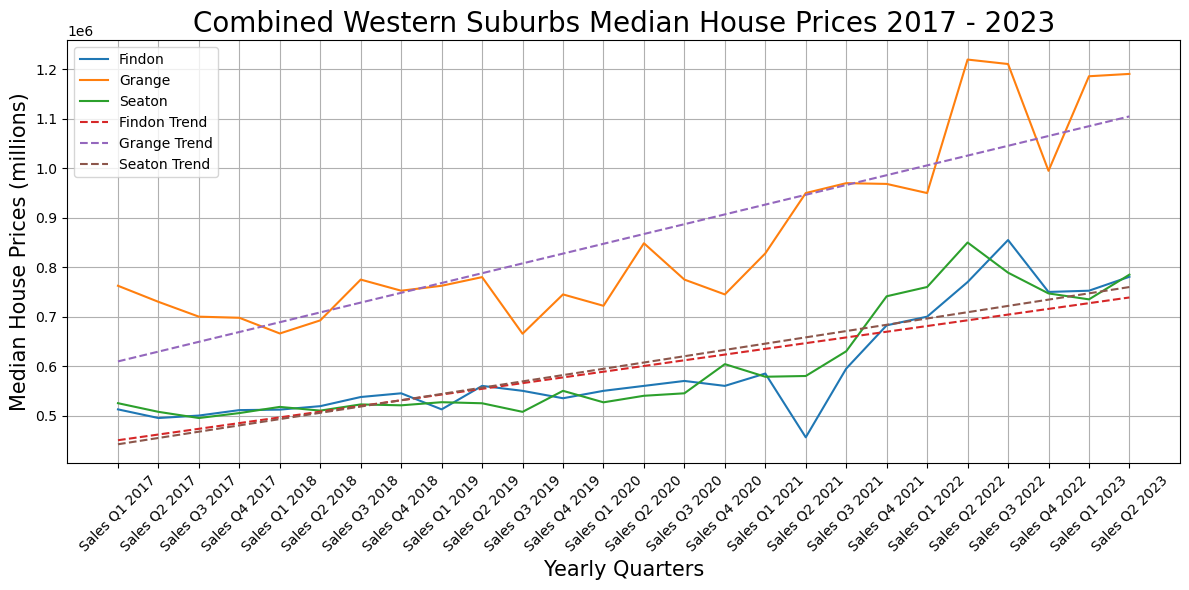

In [20]:
plt.figure(figsize = (12,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation=45)
plt.plot(x_axis, findon_price_list, label = "Findon")
plt.plot(x_axis, grange_price_list, label = "Grange")
plt.plot(x_axis, seaton_price_list, label = "Seaton")
plt.ylabel("Median House Prices (millions)", fontsize = 15)
plt.xlabel("Yearly Quarters", fontsize = 15)
plt.title("Combined Western Suburbs Median House Prices 2017 - 2023", fontsize = 20)
plt.grid(True)
plt.legend(loc="best") 

# Adding trend lines - Fit a linear trend line (change the degree for different trends)
def plot_trend_line(x, y, label):
    coeffs = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coeffs)
    plt.plot(x, trend_line(x), '--', label=f"{label} Trend")

plot_trend_line(x_axis, findon_price_list, "Findon")
plot_trend_line(x_axis, grange_price_list, "Grange")
plot_trend_line(x_axis, seaton_price_list, "Seaton")

plt.legend(loc="best")
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/MAG_combined_westrnsuburbs_price_comparison.png')

# Show plot
plt.show()

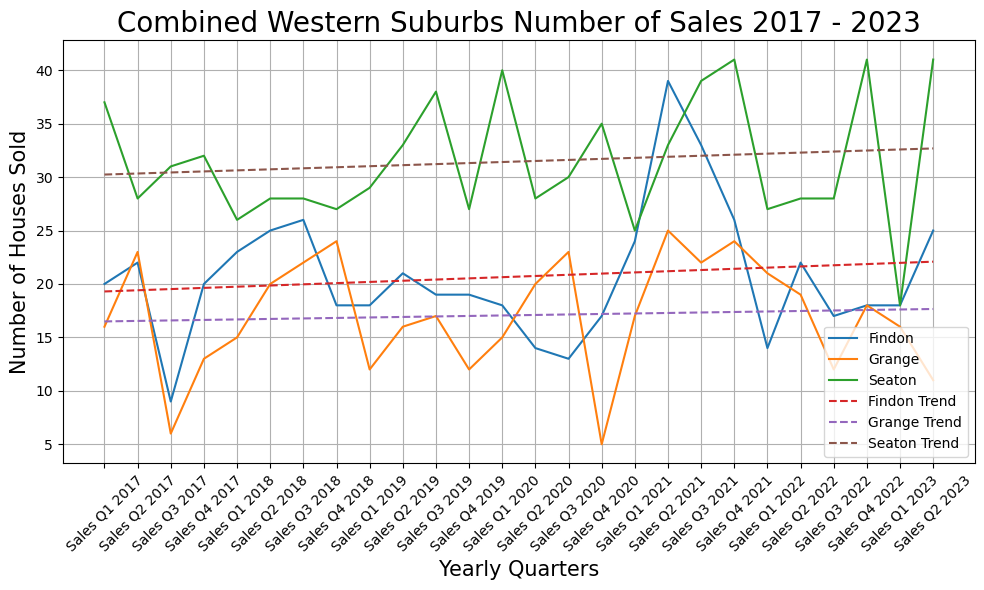

In [21]:
plt.figure(figsize = (10,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation=45)
plt.plot(x_axis, findon_sales_list, label = "Findon")
plt.plot(x_axis, grange_sales_list, label = "Grange")
plt.plot(x_axis, seaton_sales_list, label = "Seaton")
plt.ylabel("Number of Houses Sold", fontsize = 15)
plt.xlabel("Yearly Quarters", fontsize = 15)
plt.title("Combined Western Suburbs Number of Sales 2017 - 2023", fontsize = 20)
plt.grid(True)
plt.legend(loc="best") 

# Adding trend lines - Fit a linear trend line (change the degree for different trends)
def plot_trend_line(x, y, label):
    coeffs = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coeffs)
    plt.plot(x, trend_line(x), '--', label=f"{label} Trend")

plot_trend_line(x_axis, findon_sales_list, "Findon")
plot_trend_line(x_axis, grange_sales_list, "Grange")
plot_trend_line(x_axis, seaton_sales_list, "Seaton")

plt.legend()
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/MAG_combined_westrnsuburbs_sales_comparison.png')

# Show plot
plt.show()

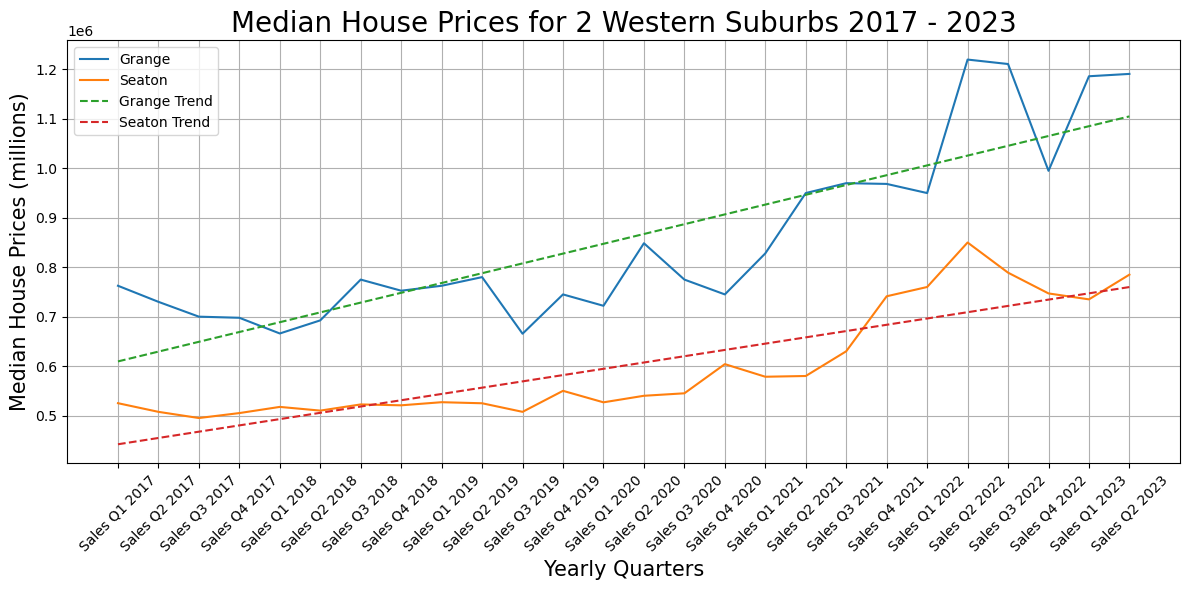

In [22]:
plt.figure(figsize = (12,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation=45)
plt.plot(x_axis, grange_price_list, label = "Grange")
plt.plot(x_axis, seaton_price_list, label = "Seaton")
plt.ylabel("Median House Prices (millions)", fontsize = 15)
plt.xlabel("Yearly Quarters", fontsize = 15)
plt.title("Median House Prices for 2 Western Suburbs 2017 - 2023", fontsize = 20)
plt.grid(True)
plt.legend(loc="best") 

# Adding trend lines
def plot_trend_line(x, y, label):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear trend line (change the degree for different trends)
    trend_line = np.poly1d(coeffs)
    trend_line_x = np.linspace(min(x), max(x), len(x))
    trend_line_y = trend_line(trend_line_x)
    plt.plot(trend_line_x, trend_line_y, '--', label=f"{label} Trend")

plot_trend_line(x_axis, grange_price_list, "Grange")
plot_trend_line(x_axis, seaton_price_list, "Seaton")

plt.legend(loc="best")
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/MAG_2_westrnsuburbs_price_comparison.png')

# Show plot
plt.show()

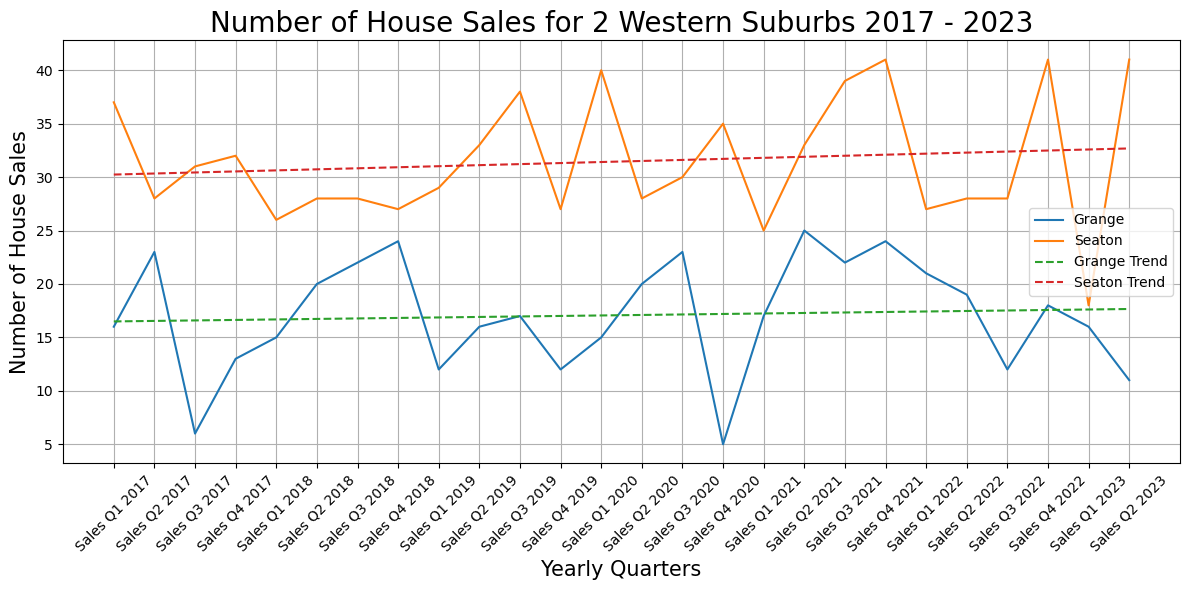

In [23]:
plt.figure(figsize = (12,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation=45)
plt.plot(x_axis, grange_sales_list, label = "Grange")
plt.plot(x_axis, seaton_sales_list, label = "Seaton")
plt.ylabel("Number of House Sales", fontsize = 15)
plt.xlabel("Yearly Quarters", fontsize = 15)
plt.title("Number of House Sales for 2 Western Suburbs 2017 - 2023", fontsize = 20)
plt.grid(True)
plt.legend(loc="best")

# Adding trend lines
def plot_trend_line(x, y, label):
    coeffs = np.polyfit(x, y, 1)
    trend_line = np.poly1d(coeffs)
    trend_line_y = trend_line(x)
    plt.plot(x, trend_line_y, '--', label=f"{label} Trend")

plot_trend_line(x_axis, grange_sales_list, "Grange")
plot_trend_line(x_axis, seaton_sales_list, "Seaton")

plt.legend(loc="best")
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/MAG_2_westrnsuburbs_sales_comparison.png')

# Show plot
plt.show()

**NORTHERN SUBURBS ANALYSIS**
--------------------------
Salisbury, Modbury, North Adelaide, Enfield comparison

In [24]:
surburb= clean_df.set_index("Suburb")
surburb

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,780500.0,22.0,...,5.0,853000.0,6.0,1400000.0,18.0,2.0,1205000.0,4.0,978000.0,6.0
NORTH ADELAIDE,ADELAIDE,6.0,992500.0,6.0,1451000.0,9.0,1375000.0,5.0,1095000.0,26.0,...,6.0,1100500.0,6.0,1325000.0,31.0,5.0,1850000.0,3.0,1040000.0,8.0
ALDGATE,ADELAIDE HILLS,14.0,695000.0,20.0,756000.0,12.0,735000.0,10.0,675000.0,56.0,...,17.0,1230000.0,14.0,1170000.0,42.0,13.0,1110000.0,11.0,1119045.0,24.0
ASHTON,ADELAIDE HILLS,1.0,415000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,900000.0,2.0,NaN,NaN,NaN,NaN,NaN
BASKET RANGE,ADELAIDE HILLS,1.0,470000.0,2.0,619500.0,1.0,488000.0,0.0,0.0,4.0,...,2.0,783000.0,1.0,875000.0,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HORSNELL GULLY,ADELAIDE HILLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1300000.0,1.0
HORSNELL GULLY,BURNSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1300000.0,1.0
ONKAPARINGA HEIGHTS,ONKAPARINGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,665000.0,1.0


In [25]:
list_surburb = surburb.loc[["SALISBURY","MODBURY","NORTH ADELAIDE","ENFIELD"]]
list_surburb

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
SALISBURY,SALISBURY,23.0,320000.0,20.0,305000.0,22.0,340000.0,26.0,305000.0,91.0,...,18.0,495000.0,25.0,523750.0,104.0,19.0,491000.0,29.0,496250.0,48.0
MODBURY,TEA TREE GULLY,23.0,370000.0,20.0,374000.0,15.0,350000.0,23.0,398500.0,81.0,...,27.0,622250.0,21.0,597500.0,95.0,21.0,580000.0,29.0,605500.0,50.0
NORTH ADELAIDE,ADELAIDE,6.0,992500.0,6.0,1451000.0,9.0,1375000.0,5.0,1095000.0,26.0,...,6.0,1100500.0,6.0,1325000.0,31.0,5.0,1850000.0,3.0,1040000.0,8.0
ENFIELD,PORT ADELAIDE ENFIELD,14.0,440000.0,23.0,407000.0,27.0,432000.0,17.0,445000.0,81.0,...,23.0,655000.0,17.0,673000.0,86.0,13.0,665500.0,35.0,597500.0,48.0


In [26]:
sales_unique_suburb= list_surburb.iloc[:,[1,3,5,7,10,12,14,16,19,21\
                                          ,23,25,28,30,32,34,37,39,41,43,46,48,50,52,55,57]]
sales_unique_suburb

,Sales Q1 2017,Sales Q2 2017,Sales Q3 2017,Sales Q4 2017,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,...,Sales Q1 2021,Sales Q2 2021,Sales Q3 2021,Sales Q4 2021,Sales Q1 2022,Sales Q2 2022,Sales Q3 2022,Sales Q4 2022,Sales Q1 2023,Sales Q2 2023
Suburb,,,,,,,,,,,,,,,,,,,,,
SALISBURY,23.0,20.0,22.0,26.0,19.0,23.0,23.0,34.0,20.0,14.0,...,19.0,27.0,26.0,30.0,30.0,31.0,18.0,25.0,19.0,29.0
MODBURY,23.0,20.0,15.0,23.0,14.0,19.0,25.0,19.0,16.0,17.0,...,17.0,24.0,25.0,28.0,25.0,22.0,27.0,21.0,21.0,29.0
NORTH ADELAIDE,6.0,6.0,9.0,5.0,2.0,6.0,9.0,9.0,10.0,6.0,...,13.0,10.0,9.0,10.0,4.0,15.0,6.0,6.0,5.0,3.0
ENFIELD,14.0,23.0,27.0,17.0,18.0,20.0,26.0,18.0,26.0,15.0,...,29.0,26.0,35.0,33.0,24.0,22.0,23.0,17.0,13.0,35.0


In [27]:
price_unique_suburb = list_surburb.iloc[:, [2,4,6,8,11,13\
    ,15,17,20,22,24,26,29,31,33,35,38,40,42,44,47,49,51,53,56,58]]
price_unique_suburb

,Median Q1 2017,Median Q2 2017,Median Q3 2017,Median Q4 2017,Median Q1 2018,Median Q2 2018,Median Q3 2018,Median Q4 2018,Median Q1 2019,Median Q2 2019,...,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022,Median Q1 2023,Median Q2 2023
Suburb,,,,,,,,,,,,,,,,,,,,,
SALISBURY,320000.0,305000.0,340000.0,305000.0,310000.0,290000.0,308000.0,306000.0,315000.0,342000.0,...,357200.0,376500.0,388000.0,427250.0,451000.0,492500.0,495000.0,523750.0,491000.0,496250.0
MODBURY,370000.0,374000.0,350000.0,398500.0,392500.0,405000.0,395500.0,415000.0,375500.0,375000.0,...,438000.0,466675.0,470000.0,532500.0,547000.0,665000.0,622250.0,597500.0,580000.0,605500.0
NORTH ADELAIDE,992500.0,1451000.0,1375000.0,1095000.0,2195500.0,1510000.0,1520000.0,1395000.0,972000.0,1634250.0,...,1410000.0,1608000.0,1250000.0,1247500.0,1617500.0,1300000.0,1100500.0,1325000.0,1850000.0,1040000.0
ENFIELD,440000.0,407000.0,432000.0,445000.0,465000.0,425500.0,456500.0,438600.0,437500.0,439000.0,...,490000.0,515000.0,542500.0,575000.0,659000.0,640000.0,655000.0,673000.0,665500.0,597500.0


In [28]:
quarter_list = sales_unique_suburb.columns
x_axis= np.arange(len(quarter_list))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [29]:
quarter_list = price_unique_suburb.columns
x_axis= np.arange(len(quarter_list))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [30]:
sales_salisbury=sales_unique_suburb.iloc[0,:]
salisbury_sales_list=list(sales_salisbury)

sales_modbury=sales_unique_suburb.iloc[1,:]
modbury_sales_list=list(sales_modbury)

sales_northadel=sales_unique_suburb.iloc[2,:]
northadel_sales_list=list(sales_northadel)

sales_enfield=sales_unique_suburb.iloc[3,:]
enfield_sales_list=list(sales_enfield)

In [31]:
price_salisbury =price_unique_suburb.iloc[0,:]
salisbury_price_list=list(price_salisbury)

price_modbury =price_unique_suburb.iloc[1,:]
modbury_price_list=list(price_modbury)

price_northadel =price_unique_suburb.iloc[2,:]
northadel_price_list=list(price_northadel)

price_enfield=price_unique_suburb.iloc[3,:]
enfield_price_list=list(price_enfield)

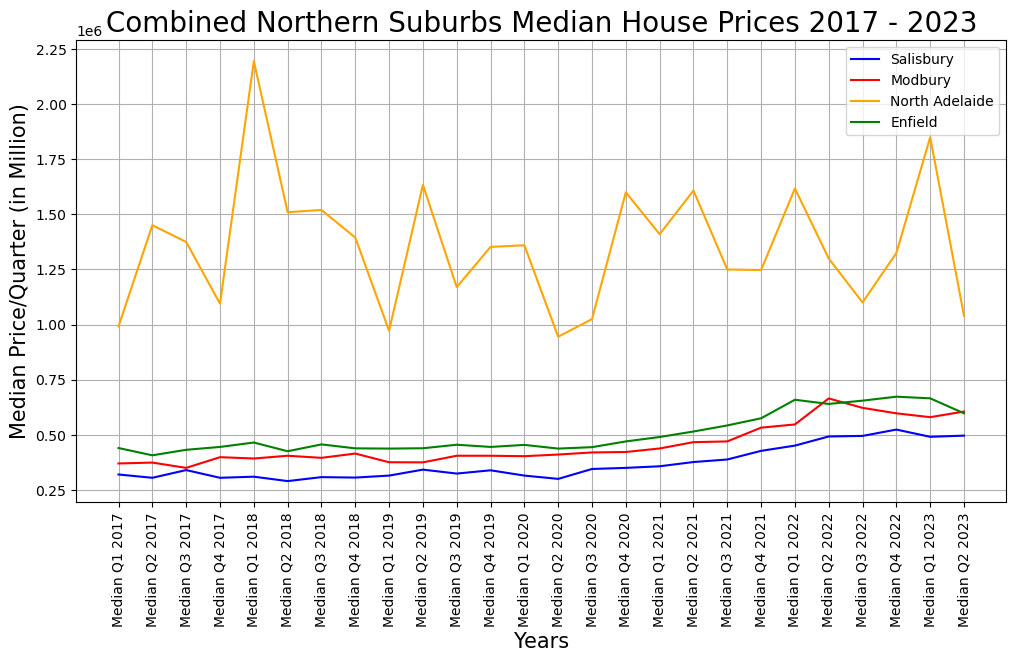

In [32]:
plt.figure(figsize=(12,6))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, salisbury_price_list, color='blue', label="Salisbury")
plt.plot(x_axis, modbury_price_list, color='red', label="Modbury")
plt.plot(x_axis, northadel_price_list, color='orange', label="North Adelaide")
plt.plot(x_axis, enfield_price_list, color='green', label="Enfield")
plt.legend(loc="lower right")
plt.legend() 
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Median Price/Quarter (in Million)", fontsize = 15)
plt.title("Combined Northern Suburbs Median House Prices 2017 - 2023", fontsize = 20)
plt.grid(True)

# Save plot
plt.savefig(f'Output_data/Plots/isha_combined_northnsuburbs_price_comparison.png')

# Show plot
plt.show()

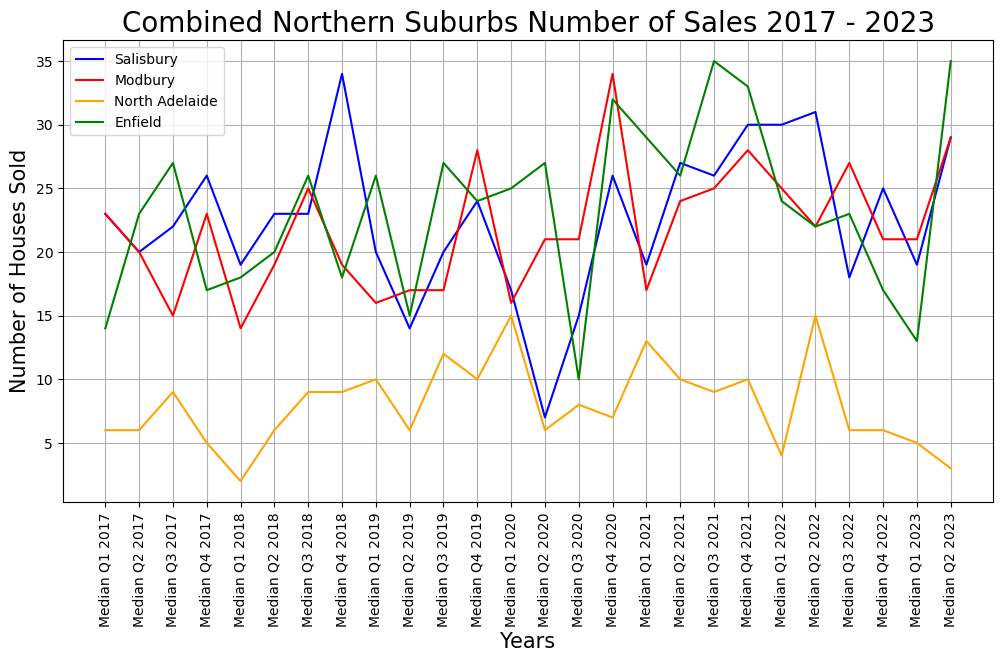

In [33]:
plt.figure(figsize = (12,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, salisbury_sales_list, color='blue', label="Salisbury")
plt.plot(x_axis, modbury_sales_list, color='red', label="Modbury")
plt.plot(x_axis, northadel_sales_list, color='orange', label="North Adelaide")
plt.plot(x_axis, enfield_sales_list, color='green', label="Enfield")
plt.ylabel("Number of Houses Sold", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.title("Combined Northern Suburbs Number of Sales 2017 - 2023", fontsize = 20)
plt.grid(True)
plt.legend() 

# Save plot
plt.savefig(f'Output_data/Plots/isha_combined_northnsuburbs_sales_comparison.png')

# Show plot
plt.show()

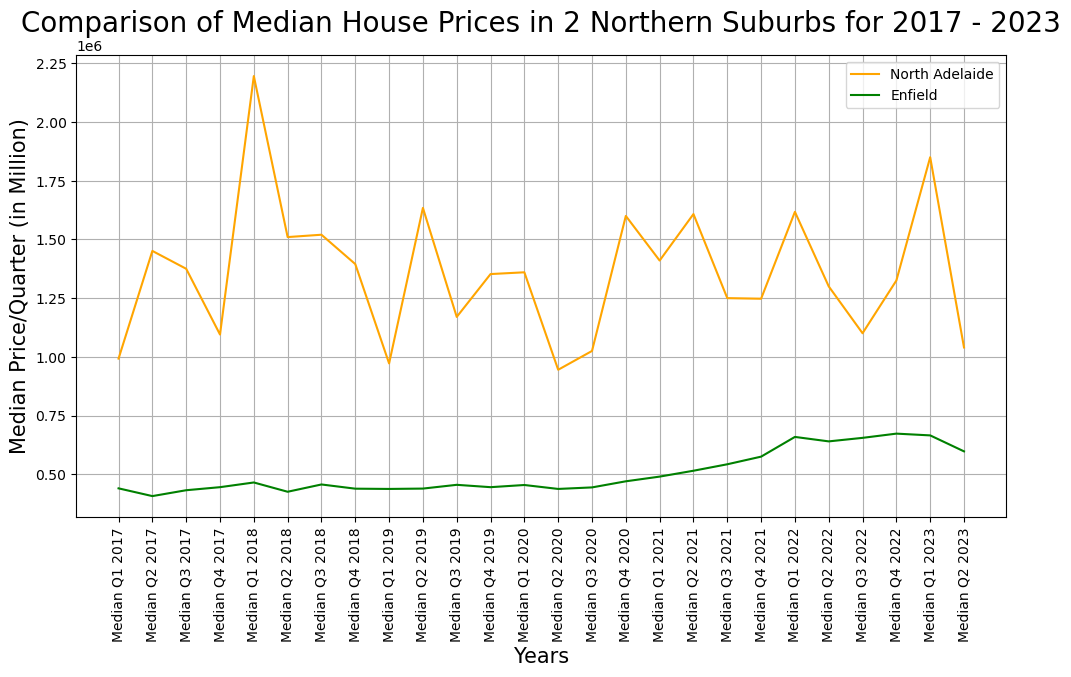

In [34]:
plt.figure(figsize=(12,6))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, northadel_price_list, color='orange', label="North Adelaide")
plt.plot(x_axis, enfield_price_list, color='green', label="Enfield")
plt.legend(loc="lower right")
plt.legend() 
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Median Price/Quarter (in Million)", fontsize = 15)
plt.title("Comparison of Median House Prices in 2 Northern Suburbs for 2017 - 2023", fontsize = 20)
plt.grid(True)

# Save plot
plt.savefig(f'Output_data/Plots/isha_2_northnsuburbs_price_comparison.png')

# Show plot
plt.show()

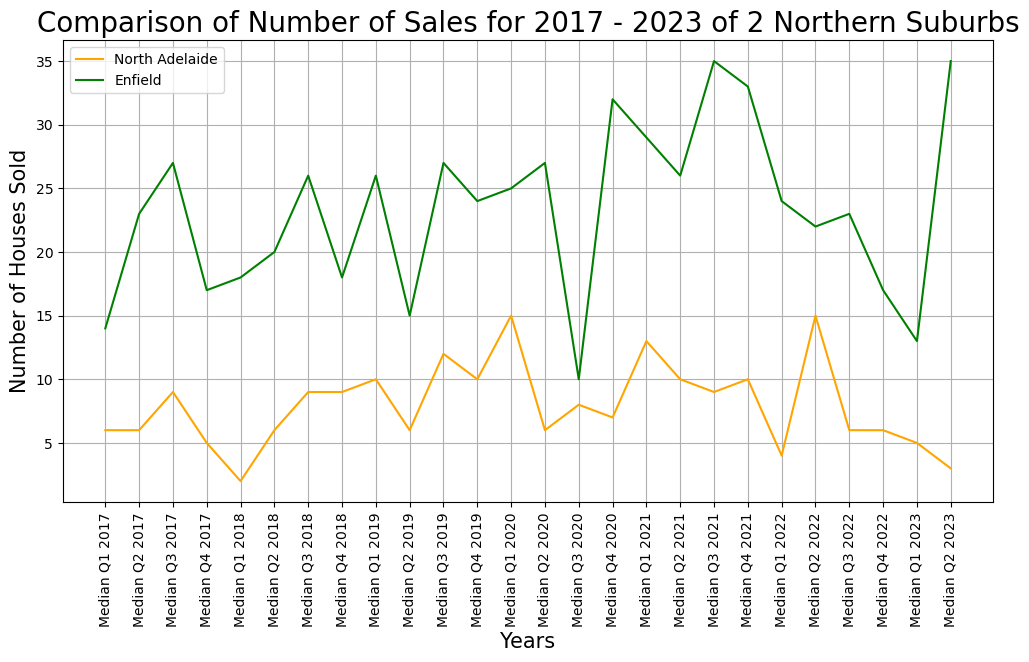

In [35]:
plt.figure(figsize = (12,6))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, northadel_sales_list, color='orange', label="North Adelaide")
plt.plot(x_axis, enfield_sales_list, color='green', label="Enfield")
plt.ylabel("Number of Houses Sold", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.title("Comparison of Number of Sales for 2017 - 2023 of 2 Northern Suburbs", fontsize = 20)
plt.grid(True)
plt.legend() 

# Save plot
plt.savefig(f'Output_data/Plots/isha_2_northnsuburbs_sales_comparison.png')

# Show plot
plt.show()

**EASTERN SUBURBS ANALYSIS**
--------------------------

In [36]:
# List of years wanted that have CSV files
years = [2018, 2019, 2020, 2021, 2022]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each year and read the corresponding CSV file
for year in years:
    file_path = Path(f"Output_data/Final_combined/{year}_quarter_combined.csv")
    if file_path.exists():
        year_data = pd.read_csv(file_path)
        combined_data = pd.concat([combined_data, year_data])

# Pivot the data to have one row per suburb and all the sales data for each year
pivot_columns = ['Number ID', 'City', 'Suburb'] \
+ [f'Sales Q{i} {year}' for year in years for i in range(1, 5)] \
+ [f'Median Q{i} {year}' for year in years for i in range(1, 5)]
combined_data_pivot = combined_data[pivot_columns].groupby(['Number ID', 'City', 'Suburb']).sum().reset_index()

# Fill NaN values with 0
combined_data_pivot.fillna(0, inplace=True)

# Save the combined data to a new CSV file
combined_data_pivot.to_csv("Output_data/Final_combined_2018-2022/raw_2018_to_2022_combined.csv", index=False)

# Print the modified combined data
combined_data_pivot

,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
0,0,ADELAIDE,ADELAIDE,5.0,5.0,1.0,4.0,4.0,4.0,4.0,...,671000.0,864750.0,1013000.0,1300000.0,1012500.0,1400000.0,1266250.0,940000.0,853000.0,1400000.0
1,1,ADELAIDE,NORTH ADELAIDE,2.0,6.0,9.0,9.0,10.0,6.0,12.0,...,1025000.0,1600000.0,1410000.0,1608000.0,1250000.0,1247500.0,1617500.0,1300000.0,1100500.0,1325000.0
2,2,ADELAIDE HILLS,ALDGATE,17.0,15.0,6.0,9.0,16.0,15.0,9.0,...,730000.0,863750.0,875000.0,971000.0,875000.0,1287500.0,870000.0,982000.0,1230000.0,1170000.0
3,3,ADELAIDE HILLS,ASHTON,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,940000.0,530000.0,765000.0,0.0,0.0,0.0,0.0,900000.0
4,4,ADELAIDE HILLS,BASKET RANGE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,725000.0,800000.0,0.0,0.0,0.0,785000.0,783000.0,875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,519,MOUNT BARKER,KANMANTOO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,471500.0
608,520,MOUNT BARKER,MACCLESFIELD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611000.0
609,521,MOUNT BARKER,MEADOWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645000.0
610,522,MOUNT BARKER,MOUNT BARKER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624000.0


In [37]:
# Identify if there are duplicate entries based on 'Suburb'
duplicate_mask = combined_data_pivot.duplicated(subset=['Suburb'], keep=False)

# Display duplicate rows
duplicate_rows = combined_data_pivot[duplicate_mask]
print("Duplicate Rows:")
duplicate_rows

Duplicate Rows:


,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
5,5,ADELAIDE HILLS,BELAIR,14.0,14.0,9.0,19.0,15.0,17.0,18.0,...,665000.0,668000.0,810000.0,910000.0,815000.0,950000.0,1072500.0,975000.0,816000.0,963000.0
11,13,ADELAIDE HILLS,CRAFERS WEST,5.0,8.0,3.0,3.0,6.0,5.0,2.0,...,947500.0,650000.0,702500.0,678500.0,847250.0,1056000.0,725000.0,845500.0,1243000.0,887625.0
14,19,ADELAIDE HILLS,IRONBANK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,937000.0,0.0,580000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,27,ADELAIDE HILLS,ROSTREVOR,32.0,38.0,23.0,26.0,31.0,33.0,25.0,...,662500.0,650000.0,668800.0,746250.0,755000.0,897500.0,840000.0,952500.0,897000.0,861000.0
25,30,ADELAIDE HILLS,STONYFELL,4.0,3.0,7.0,2.0,3.0,12.0,2.0,...,925000.0,870000.0,1220094.0,1400000.0,1123750.0,1625000.0,1350000.0,1158500.0,1500000.0,1300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,477,WEST TORRENS,WEST BEACH,13.0,12.0,14.0,13.0,16.0,14.0,13.0,...,805000.0,875000.0,899500.0,1183000.0,1105000.0,1025000.0,0.0,0.0,0.0,0.0
589,478,WEST TORRENS,WEST BEACH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1020000.0,1065000.0,1086250.0,0.0
590,478,WEST TORRENS,WEST RICHMOND,7.0,2.0,1.0,2.0,4.0,5.0,6.0,...,475500.0,388500.0,527500.0,485500.0,562000.0,680438.0,0.0,0.0,0.0,0.0
591,479,WEST TORRENS,WEST RICHMOND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,525000.0,745000.0,733000.0


In [38]:
# Check any suburb in dupicate_rows DataFrame to confirm duplicates
duplicate_data = combined_data_pivot[combined_data_pivot['Suburb'] == 'UNLEY']
duplicate_data

,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
532,446,UNLEY,UNLEY,9.0,9.0,7.0,11.0,7.0,10.0,3.0,...,1270000.0,894000.0,1325000.0,1192500.0,1760000.0,2100000.0,0.0,0.0,0.0,0.0
533,447,UNLEY,UNLEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1727500.0,1417500.0,1950000.0,1965000.0


In [39]:
# Remove duplicates
combined_data_cleaned = combined_data_pivot.drop_duplicates(subset=['Suburb'])

# Display cleaned DataFrame
print("Cleaned DataFrame:")
combined_data_cleaned

Cleaned DataFrame:


,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
0,0,ADELAIDE,ADELAIDE,5.0,5.0,1.0,4.0,4.0,4.0,4.0,...,671000.0,864750.0,1013000.0,1300000.0,1012500.0,1400000.0,1266250.0,940000.0,853000.0,1400000.0
1,1,ADELAIDE,NORTH ADELAIDE,2.0,6.0,9.0,9.0,10.0,6.0,12.0,...,1025000.0,1600000.0,1410000.0,1608000.0,1250000.0,1247500.0,1617500.0,1300000.0,1100500.0,1325000.0
2,2,ADELAIDE HILLS,ALDGATE,17.0,15.0,6.0,9.0,16.0,15.0,9.0,...,730000.0,863750.0,875000.0,971000.0,875000.0,1287500.0,870000.0,982000.0,1230000.0,1170000.0
3,3,ADELAIDE HILLS,ASHTON,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,940000.0,530000.0,765000.0,0.0,0.0,0.0,0.0,900000.0
4,4,ADELAIDE HILLS,BASKET RANGE,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,725000.0,800000.0,0.0,0.0,0.0,785000.0,783000.0,875000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,519,MOUNT BARKER,KANMANTOO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,471500.0
608,520,MOUNT BARKER,MACCLESFIELD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611000.0
609,521,MOUNT BARKER,MEADOWS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645000.0
610,522,MOUNT BARKER,MOUNT BARKER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,624000.0


In [40]:
# Check if cleaned DataFrame contains duplicate rows
duplicate_data = combined_data_cleaned[combined_data_pivot['Suburb'] == 'UNLEY'] 
duplicate_data

C:\Users\hoang\AppData\Local\Temp\ipykernel_10392\3834276284.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_data = combined_data_cleaned[combined_data_pivot['Suburb'] == 'UNLEY']


,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
532,446,UNLEY,UNLEY,9.0,9.0,7.0,11.0,7.0,10.0,3.0,...,1270000.0,894000.0,1325000.0,1192500.0,1760000.0,2100000.0,0.0,0.0,0.0,0.0


In [41]:
# Save combined_data_cleaned to a new CSV file
combined_data_cleaned.to_csv("Output_data/Final_combined_2018-2022/cleaned_2018_to_2022_combined.csv", index=False)

In [42]:
# Suburbs wanted for plots
suburbs_of_interest = ['NORWOOD', 'BURNSIDE'] # (Personal note) Add Burnside to suburbs if wanting to make scatter plot

# Filter the DataFrame to include only the desired suburbs
desired_suburbs_data = combined_data_cleaned[combined_data_cleaned['Suburb'].isin(suburbs_of_interest)]

# Print the filtered and modified data
desired_suburbs_data

,Number ID,City,Suburb,Sales Q1 2018,Sales Q2 2018,Sales Q3 2018,Sales Q4 2018,Sales Q1 2019,Sales Q2 2019,Sales Q3 2019,...,Median Q3 2020,Median Q4 2020,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022
35,40,BURNSIDE,BURNSIDE,10.0,12.0,9.0,17.0,6.0,4.0,11.0,...,825000.0,924000.0,1107500.0,1200000.0,1000000.0,1522000.0,1470000.0,1750500.0,1380000.0,1450000.0
202,213,NORWOOD PAYNEHAM & ST PETERS,NORWOOD,10.0,16.0,6.0,13.0,13.0,11.0,17.0,...,1070000.0,1190000.0,1025000.0,1047500.0,1365000.0,1350000.0,1700000.0,1406000.0,1525000.0,1250000.0


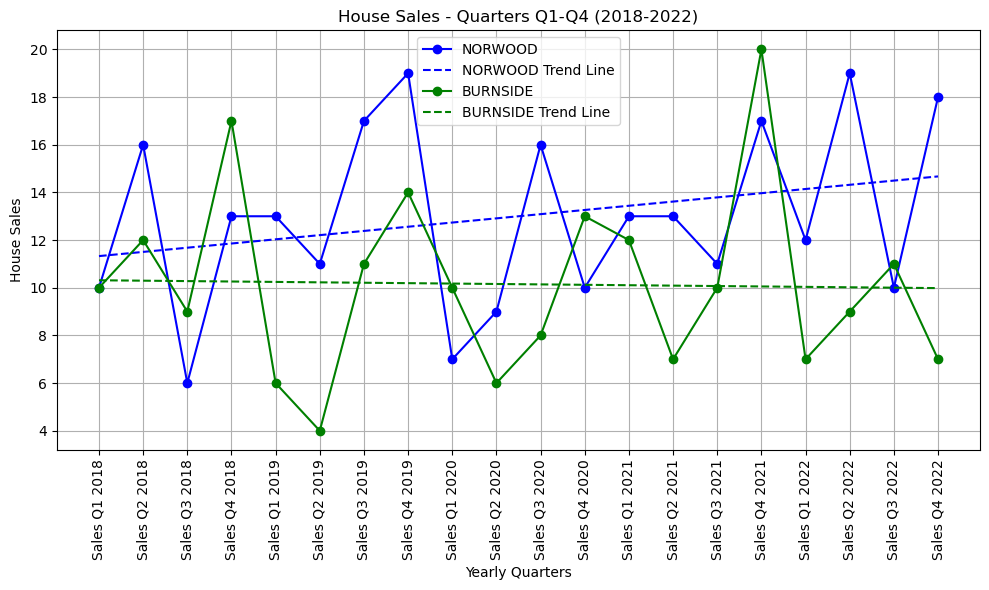

In [43]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define a list of colors for each suburb
colors = ['blue', 'green']  # Add more colors as needed

# Iterate over each suburb and its corresponding color
for i, suburb in enumerate(suburbs_of_interest):
    suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
    # Extract the sales data for the x-axis (all years)
    x_values = [f'Sales Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    
    # Extract the data for the specific suburb
    y_values = suburb_data[x_values].values.flatten()

    # Calculate and add trend line
    slope, intercept, _, _, _ = linregress(range(len(y_values)), y_values)
    trend_line = [slope * x + intercept for x in range(len(y_values))]
    
    # Plot the data and trend line for the current suburb with its designated color
    plt.plot(x_values, y_values, marker='o', color=colors[i], label=suburb)
    plt.plot(x_values, trend_line, color=colors[i], linestyle='--', label=f'{suburb} Trend Line')

# Configure plot settings
plt.xlabel('Yearly Quarters')
plt.ylabel('House Sales')
plt.title('House Sales - Quarters Q1-Q4 (2018-2022)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/jordan_all_suburbs_house_sales_line_plot.png')

# Show plot
plt.show()

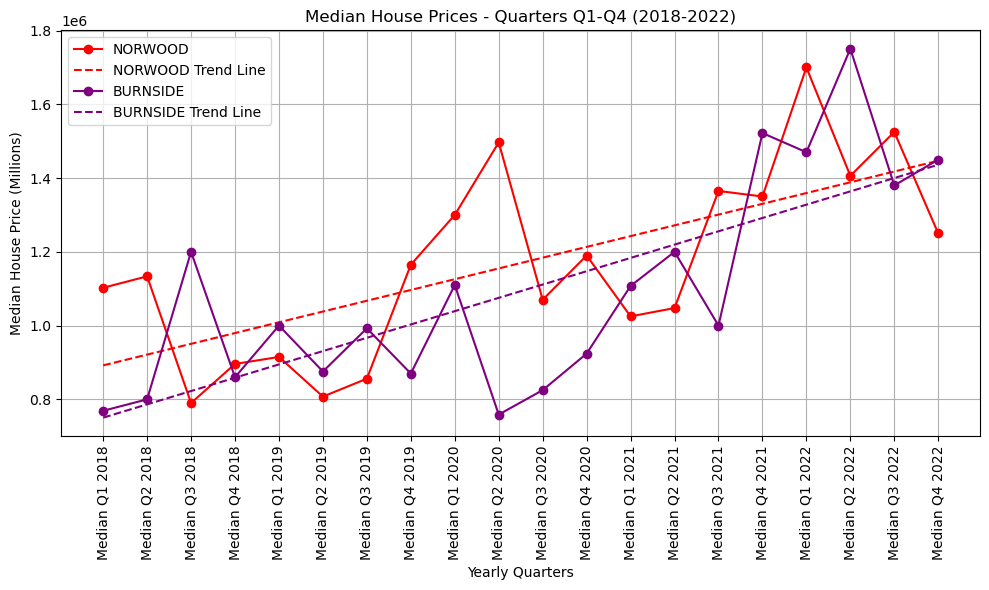

In [44]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define a list of colors for each suburb
colors = ['red', 'purple']  # Add more colors as needed

# Iterate over each suburb and its corresponding color
for i, suburb in enumerate(suburbs_of_interest):
    suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
    # Extract the median data for the x-axis (all years)
    x_values = [f'Median Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    
    # Extract the data for the specific suburb
    y_values = suburb_data[x_values].values.flatten()

    # Calculate and add trend line
    slope, intercept, _, _, _ = linregress(range(len(y_values)), y_values)
    trend_line = [slope * x + intercept for x in range(len(y_values))]
    
    # Plot the data and trend lines for the current suburb with its designated color
    plt.plot(x_values, y_values, marker='o', color=colors[i], label=suburb)
    plt.plot(x_values, trend_line, color=colors[i], linestyle='--', label=f'{suburb} Trend Line')

# Configure plot settings
plt.xlabel('Yearly Quarters')
plt.ylabel('Median House Price (Millions)')
plt.title('Median House Prices - Quarters Q1-Q4 (2018-2022)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig(f'Output_data/Plots/jordan_all_suburbs_median_house_prices_line_plot.png')

# Show plot
plt.show()

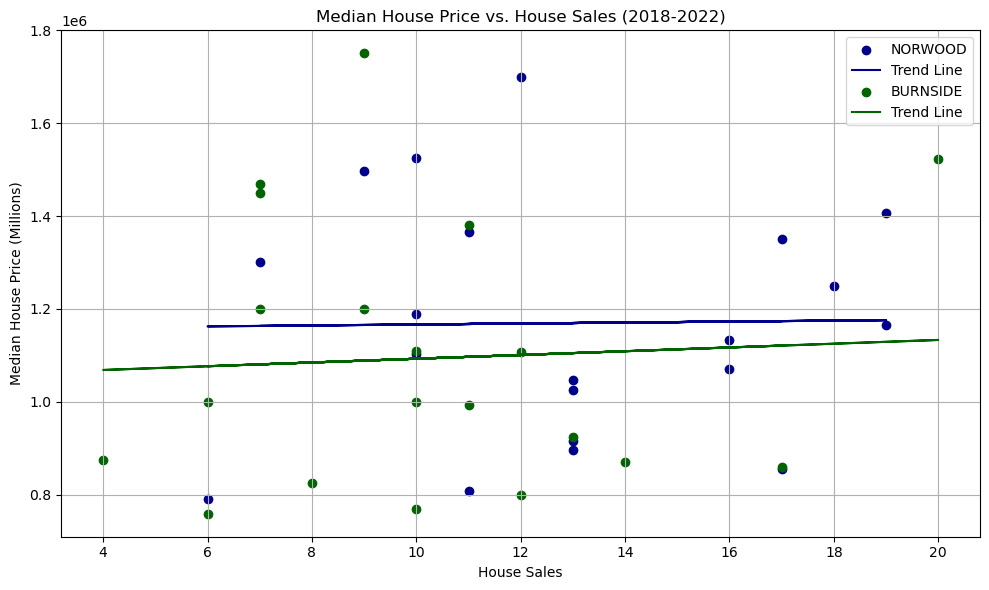

In [45]:
# Create a figure and axis
plt.figure(figsize=(10, 6))

# Define colors for suburbs
colors = ['darkblue', 'darkgreen']

# Iterate over each suburb
for i, suburb in enumerate(suburbs_of_interest):
    suburb_data = desired_suburbs_data[desired_suburbs_data['Suburb'] == suburb]
    
    # Extract the median and sales data for the x-axis (all years)
    x_values = [f'Median Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    median_values = suburb_data[x_values].values.flatten()
    
    sales_x_values = [f'Sales Q{i} {year}' for year in range(2018, 2023) for i in range(1, 5)]
    sales_values = suburb_data[sales_x_values].values.flatten()

    # Configure scatter plot
    plt.scatter(sales_values, median_values, label=suburb, color=colors[i], marker='o')

    # Calculate and add trend line
    slope, intercept = np.polyfit(sales_values, median_values, 1)
    trend_line = [slope * x + intercept for x in sales_values]
    plt.plot(sales_values, trend_line, color=colors[i], linestyle='-', label='Trend Line')

# Configure plot settings
plt.xlabel('House Sales')
plt.ylabel('Median House Price (Millions)')
plt.title('Median House Price vs. House Sales (2018-2022)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig('Output_data/Plots/jordan_all_suburbs_median_vs_sales_scatter_plot.png')

# Show plot
plt.show()


**COMBINATION of suburbs from 4 direction North, East, South, West in relation with Adelaide CBD**
-----------------------

In [46]:
quarter_list = price_unique_suburb.columns
x_axis= np.arange(len(quarter_list))

In [47]:
list_surburb = surburb.loc[["ADELAIDE", "FLAGSTAFF HILL", "NORWOOD", "BURNSIDE", "GRANGE",\
    "SEATON", "NORTH ADELAIDE", "MODBURY"]]
list_surburb.head()

,City,Sales Q1 2017,Median Q1 2017,Sales Q2 2017,Median Q2 2017,Sales Q3 2017,Median Q3 2017,Sales Q4 2017,Median Q4 2017,2017 Sales,...,Sales Q3 2022,Median Q3 2022,Sales Q4 2022,Median Q4 2022,2022 Sales,Sales Q1 2023,Median Q1 2023,Sales Q2 2023,Median Q2 2023,2023 Sales
Suburb,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,ADELAIDE,6.0,627500.0,6.0,900000.0,4.0,695000.0,6.0,780500.0,22.0,...,5.0,853000.0,6.0,1400000.0,18.0,2.0,1205000.0,4.0,978000.0,6.0
FLAGSTAFF HILL,ONKAPARINGA,40.0,482000.0,42.0,505000.0,41.0,500000.0,41.0,511000.0,164.0,...,44.0,775000.0,35.0,785000.0,157.0,26.0,850000.0,27.0,815000.0,53.0
NORWOOD,NORWOOD PAYNEHAM & ST PETERS,12.0,801000.0,17.0,900000.0,13.0,982500.0,9.0,842750.0,51.0,...,10.0,1525000.0,18.0,1250000.0,59.0,9.0,1600000.0,14.0,1870000.0,23.0
BURNSIDE,BURNSIDE,11.0,873500.0,10.0,823000.0,10.0,1008000.0,3.0,825000.0,34.0,...,11.0,1380000.0,7.0,1450000.0,34.0,8.0,1460000.0,11.0,1280000.0,19.0
GRANGE,CHARLES STURT,16.0,762500.0,23.0,730000.0,6.0,700000.0,13.0,697750.0,58.0,...,12.0,1211000.0,18.0,995000.0,70.0,16.0,1186250.0,11.0,1191000.0,27.0


In [48]:
price_unique_suburb = list_surburb.iloc[:, [2,4,6,8,11,13\
    ,15,17,20,22,24,26,29,31,33,35,38,40,42,44,47,49,51,53,56,58]]
price_unique_suburb

,Median Q1 2017,Median Q2 2017,Median Q3 2017,Median Q4 2017,Median Q1 2018,Median Q2 2018,Median Q3 2018,Median Q4 2018,Median Q1 2019,Median Q2 2019,...,Median Q1 2021,Median Q2 2021,Median Q3 2021,Median Q4 2021,Median Q1 2022,Median Q2 2022,Median Q3 2022,Median Q4 2022,Median Q1 2023,Median Q2 2023
Suburb,,,,,,,,,,,,,,,,,,,,,
ADELAIDE,627500.0,900000.0,695000.0,780500.0,861000.0,696000.0,960000.0,1660750.0,1002500.0,677500.0,...,1013000.0,1300000.0,1012500.0,1400000.0,1266250.0,940000.0,853000.0,1400000.0,1205000.0,978000.0
FLAGSTAFF HILL,482000.0,505000.0,500000.0,511000.0,478750.0,500000.0,530000.0,554500.0,510000.0,536000.0,...,602250.0,677000.0,620000.0,684000.0,720000.0,790000.0,775000.0,785000.0,850000.0,815000.0
NORWOOD,801000.0,900000.0,982500.0,842750.0,1102500.0,1133500.0,790000.0,896000.0,915000.0,807500.0,...,1025000.0,1047500.0,1365000.0,1350000.0,1700000.0,1406000.0,1525000.0,1250000.0,1600000.0,1870000.0
BURNSIDE,873500.0,823000.0,1008000.0,825000.0,769000.0,800000.0,1200000.0,860000.0,1000000.0,875500.0,...,1107500.0,1200000.0,1000000.0,1522000.0,1470000.0,1750500.0,1380000.0,1450000.0,1460000.0,1280000.0
GRANGE,762500.0,730000.0,700000.0,697750.0,666000.0,692500.0,775000.0,752500.0,762500.0,780000.0,...,828000.0,950000.0,970000.0,968500.0,950000.0,1220000.0,1211000.0,995000.0,1186250.0,1191000.0
SEATON,525000.0,507500.0,495000.0,505000.0,517500.0,510000.0,522500.0,520705.0,526999.0,524850.0,...,578500.0,580000.0,630000.0,741250.0,760000.0,850000.0,789000.0,747000.0,735000.0,785000.0
NORTH ADELAIDE,992500.0,1451000.0,1375000.0,1095000.0,2195500.0,1510000.0,1520000.0,1395000.0,972000.0,1634250.0,...,1410000.0,1608000.0,1250000.0,1247500.0,1617500.0,1300000.0,1100500.0,1325000.0,1850000.0,1040000.0
MODBURY,370000.0,374000.0,350000.0,398500.0,392500.0,405000.0,395500.0,415000.0,375500.0,375000.0,...,438000.0,466675.0,470000.0,532500.0,547000.0,665000.0,622250.0,597500.0,580000.0,605500.0


In [49]:
price_adel =price_unique_suburb.iloc[0,:]
adel_price_list=list(price_adel)

price_flghill =price_unique_suburb.iloc[1,:]
flghill_price_list=list(price_flghill)

price_norwood =price_unique_suburb.iloc[2,:]
norwood_price_list=list(price_norwood)

price_burnside =price_unique_suburb.iloc[3,:]
burnside_price_list=list(price_burnside)

price_grange =price_unique_suburb.iloc[4,:]
grange_price_list=list(price_grange)

price_seaton =price_unique_suburb.iloc[5,:]
seaton_price_list=list(price_seaton)

price_northadel =price_unique_suburb.iloc[6,:]
northadel_price_list=list(price_northadel)

price_modbury =price_unique_suburb.iloc[7,:]
modbury_price_list=list(price_modbury)

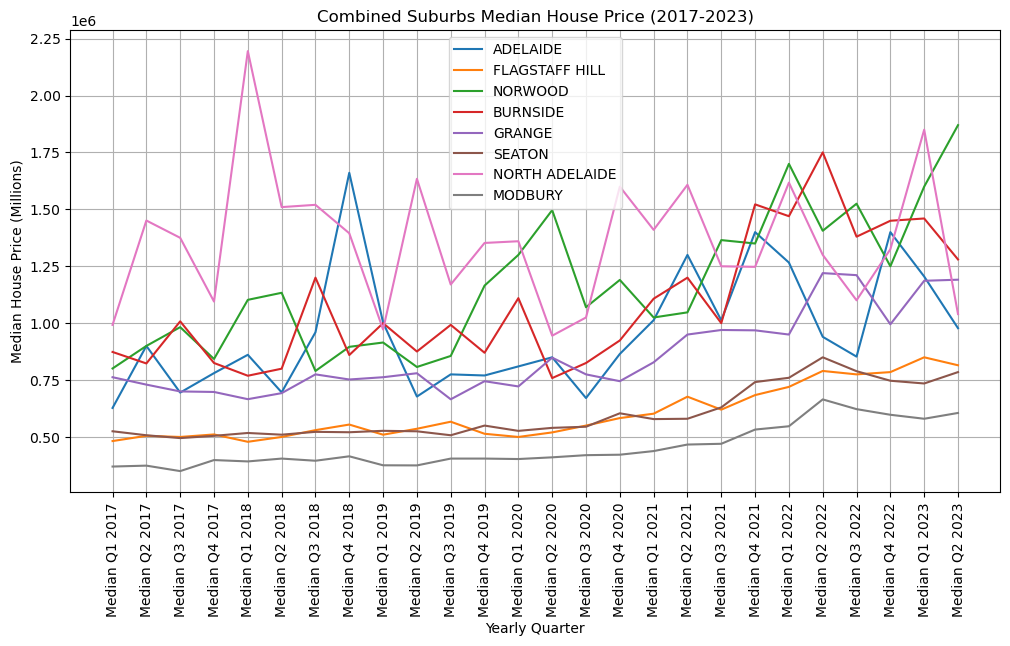

In [56]:
plt.figure(figsize=(12,6))
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations, quarter_list, rotation="vertical")
plt.plot(x_axis, adel_price_list, label="ADELAIDE")
plt.plot(x_axis, flghill_price_list, label="FLAGSTAFF HILL")
plt.plot(x_axis, norwood_price_list, label="NORWOOD")
plt.plot(x_axis, burnside_price_list, label="BURNSIDE")
plt.plot(x_axis, grange_price_list, label="GRANGE")
plt.plot(x_axis, seaton_price_list, label="SEATON")
plt.plot(x_axis, northadel_price_list, label="NORTH ADELAIDE")
plt.plot(x_axis, modbury_price_list, label="MODBURY")
plt.ylabel("Median House Price (Millions)")
plt.xlabel("Yearly Quarter")
plt.title("Combined Suburbs Median House Price (2017-2023)")
plt.grid()
plt.legend(loc="upper center")

# Save plot
plt.savefig('Output_data/Plots/VAN_all_suburbs_median_price_comparison.png')

# Show plot
plt.show()